# Image Classification with CNN using Keras

# Task 1: Import Libraries

In [2]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')
    
print('TensorFlow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())

TensorFlow version: 2.2.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is using GPU? False


# Task 2: Preprocess Data

In [3]:
def get_three_classes(x, y):
    indices_0, _ = np.where(y == 0.)
    indices_1, _ = np.where(y == 1.)
    indices_2, _ = np.where(y == 2.)

    indices = np.concatenate([indices_0, indices_1, indices_2], axis=0)
    
    x = x[indices]
    y = y[indices]
    
    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)
    
    x = x[indices]
    y = y[indices]
    
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

In [4]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.cifar10.load_data()
x_train, y_train = get_three_classes(x_train, y_train)
x_test, y_test =get_three_classes(x_test,y_test)
print(x_train.shape ,y_train.shape)
print(x_test.shape,y_test.shape)

170500096/170498071 [==============================] - 396s 2us/step
(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


# Task 3: Visualize Examples

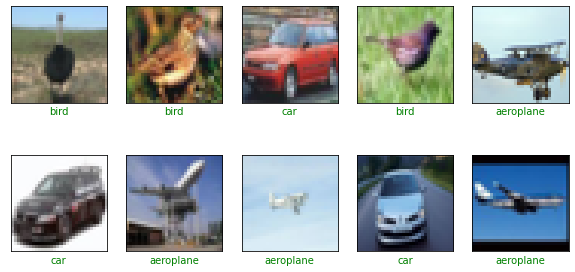

In [5]:
class_names = ['aeroplane', 'car', 'bird']

def show_random_examples(x,y,p):
    indices=np.random.choice(range(x.shape[0]),10,replace=False)
    x=x[indices]
    y=y[indices]
    p=p[indices]
    plt.figure(figsize=(10,5))
    for i in range(10):
        plt.subplot(2,5,1+i)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        col= 'green' if np.argmax (y[i]) == np.argmax (p[i]) else 'red'
        plt.xlabel(class_names[np.argmax(p[i])],color=col)
    plt.show()

    
show_random_examples(x_train,y_train,y_train)

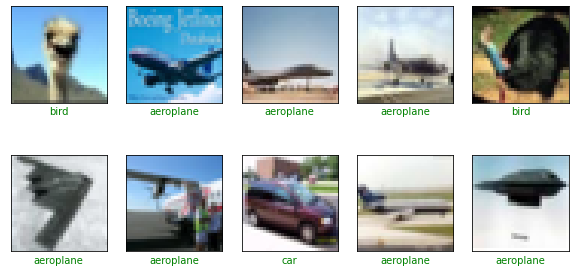

In [6]:
show_random_examples(x_test, y_test, y_test)

# Task 4: Create Model

In [17]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

def create_model():
    def add_conv_block(model, num_filters):
        model.add(Conv2D(num_filters, 3 , activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(Conv2D(num_filters, 3, activation='relu'))
        model.add(MaxPooling2D(pool_size=2))
        model.add(Dropout(0.5))
        return model
    
    model=tf.keras.models.Sequential()
    model.add(Input(shape=(32, 32, 3)))
    
    model = add_conv_block(model, 32)
    model = add_conv_block(model, 64)
    model = add_conv_block(model, 128)
    
    model.add(Flatten())
    model.add(Dense(3, activation='softmax'))
    
    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam', metrics=['accuracy']
    )
    return model

model=create_model()
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 15, 15, 64)       

# Task 5: Train the Model

In [23]:
h = model.fit(
    x_train/255., y_train,
    validation_data=(x_test/255., y_test),
    epochs=10, batch_size=128,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
        tf.keras.callbacks.ModelCheckpoint(
            'models/model_{val_accuracy:.3f}.h5',
            save_best_only=True,
            save_weights_only=False,
            monitor='val_accuracy'
        )
        
    ]

)

Epoch 1/10
118/118 [==============================] - 66s 555ms/step - loss: 0.9109 - accuracy: 0.6752 - val_loss: 2.3742 - val_accuracy: 0.3333
Epoch 2/10
118/118 [==============================] - 77s 655ms/step - loss: 0.5699 - accuracy: 0.7743 - val_loss: 2.7042 - val_accuracy: 0.4863
Epoch 3/10
118/118 [==============================] - 128s 1s/step - loss: 0.4961 - accuracy: 0.8033 - val_loss: 2.4131 - val_accuracy: 0.4423
Epoch 4/10
118/118 [==============================] - 125s 1s/step - loss: 0.4545 - accuracy: 0.8219 - val_loss: 1.9026 - val_accuracy: 0.4730
Epoch 5/10
118/118 [==============================] - 107s 906ms/step - loss: 0.4259 - accuracy: 0.8314 - val_loss: 1.4482 - val_accuracy: 0.5660
Epoch 6/10
118/118 [==============================] - 103s 871ms/step - loss: 0.3930 - accuracy: 0.8465 - val_loss: 0.4931 - val_accuracy: 0.8130
Epoch 7/10
118/118 [==============================] - 85s 721ms/step - loss: 0.3606 - accuracy: 0.8596 - val_loss: 0.5653 - val_accu

# Task 6: Final Predictions